# Exercise 3: PPG SNR

A useful task for evaluating PPG signals is computing the signal-to-noise ratio (SNR). The SNR of a signal is a measure of how noisy the signal. High SNRs mean that the signal has very little noise. Often times, calculating the SNR is more of an art than a science because very often, we don't know which parts of the signal are noise and which are not.

When you have a PPG signal with a contemporaneous reference pulse rate, you can use that pulse rate to approximate the SNR of the PPG signal. Ideally, most of the energy in the Fourier transform of the signal should be concentrated around the pulse rate frequency (and any harmonics of that frequency). So one measure of SNR would be the ratio of energy around the pulse rate frequency (and harmonics) to the amount of energy elsewhere.

This exercise will guide you through this process for three different signals.

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import mpld3
mpld3.enable_notebook()

## Load Data

You are given 3 different signals along with the average heart rate for that signal in beats per minute (BPM).

In [3]:
fs = 125
with np.load('./exercise3.npz') as npz:
    sig0 = npz['sig0']
    hr0_bpm = npz['hr0_bpm']
    sig1 = npz['sig1']
    hr1_bpm = npz['hr1_bpm']
    sig2 = npz['sig2']
    hr2_bpm = npz['hr2_bpm']

## Data Exploration

Use this space to explore your data. Plot your signals and the Fourier transforms. Think about which signals have a higher SNR and what you notice about their FFTs.

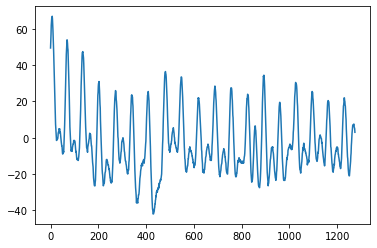

In [7]:
plt.plot(sig0)

In [9]:
freqs = np.fft.rfftfreq(len(sig0), 1/fs)
fft_mag = np.abs(np.fft.rfft(sig0))

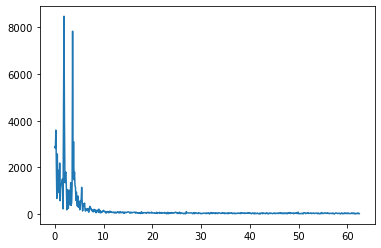

In [10]:
plt.plot(freqs, fft_mag)

In [12]:
hr0_bpm / 60

1.8445083333333332

## Calculate SNR Function

The SNR is the ratio of signal power to noise power. To calculate the signal power:
  - compute the FFT of the signal
  - calculating the signal power by:
    - summing the FFT magnitudes in a window of 5 BPM around the frequency of the average heart rate
    - and summing the FFT magnitudes in a window of 5 BPM around the first harmonic of the average heart rate
  - calculate the noise power by:
    - summing the FFT magnitudes everywhere else
  - divide the signal power by the noise power

In [13]:
def CalcSNR(sig, hr_bpm):
    # Our data is sampled at 125 Hz
    fs = 125
    
    # Convert hr_bpm to Hz
    hr_f = hr_bpm / 60
    
    #Calculate the frequency of the first harmonic
    harmonic_f = hr_f * 2
    
    # Compute the FFT of our signal
    freq = np.fft.rfftfreq(len(sig), 1/fs)
    fft_mag = np.abs(np.fft.rfft(sig))
    
    # FInd the frequencies that are around the heart rate and the first harmonic of the heart rate
    window_f = 5 / 60 # 5 BPM in Hz
    fundamental_frequency_window = (freqs > hr_f - window_f) & (freqs < hr_f + window_f)
    harmonic_frequency_window = (freqs > harmonic_f - window_f) & (freqs < harmonic_f + window_f)

    # Compute signal power and noise power
    signal_power = np.sum(fft_mag[(fundamental_frequency_window) | (harmonic_frequency_window)])
    noise_power =  np.sum(fft_mag[~(fundamental_frequency_window) | (harmonic_frequency_window)])

    # Compute SNR
    snr = signal_power / noise_power
    return snr

## Compute SNR on our signals

Now run the CalcSNR function on our signals and see if they match up with the expected results.

In [14]:
snr0 = CalcSNR(sig0, hr0_bpm)
snr0

0.21662681794989666

In [15]:
snr1 = CalcSNR(sig1, hr1_bpm)
snr1

0.11857584479989025

In [16]:
snr2 = CalcSNR(sig2, hr2_bpm)
snr2

0.048254687106539566

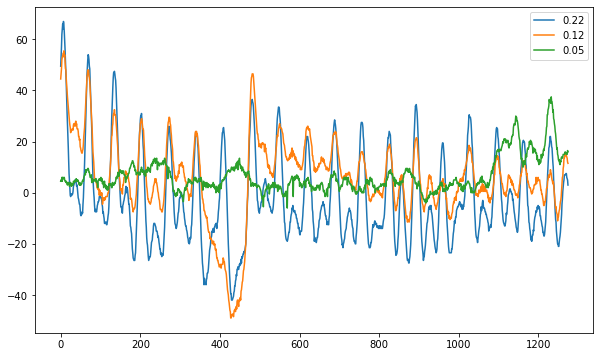

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(sig0, label='{:0.2f}'.format(snr0)) 
plt.plot(sig1, label='{:0.2f}'.format(snr1))
plt.plot(sig2, label='{:0.2f}'.format(snr2))
plt.legend()

[Soluntion](https://www.youtube.com/watch?v=gQUNhJk2doc&t=250s)